## **Spinal Risk Score Calculations**

We want to calculate an aggregate risk score using survey responses to specific risk questions. We can start by importing the necessary modules to perform this task.

In [1]:
#imports
import pandas as pd
import re
import matplotlib.pyplot as plt

In [51]:
#Import the dataset -- change csv file path as needed
pat_res = pd.read_csv("../data/RiskFinal_DATA_2024-02-05_0017_combined.csv")

After importing the full data, we can display the dataframe to get a better idea of what the data looks like. 

In [53]:
pd.set_option('display.max_columns', None)
pat_res

,record_id,risk_1_timestamp,age,sex,height,weight,zipcode,ethnicity,income,education,prior_surg,spin_surg,succ_surg,religion,odi_1,odi_2,odi_3,odi_4,odi_5,odi_6,odi_7,odi_8,odi_9,odi_10,exer_50improv_1drop,exer_50improv_10drop,exer_50improv_50drop,exer_50improv_90drop,att_check_1,exer_90improv_1drop,exer_90improv_10drop,exer_90improv_50drop,exer_90improv_90drop,exer_50pain_1death,exer_50pain_10death,exer_50pain_50death,exer_90pain_1death,exer_90pain_10death,exer_90pain_50death,work_50improv_1drop,work_50improv_10drop,work_50improv_50drop,work_50improv_90drop,work_90improv_1drop,work_90improv_10drop,work_90improv_50drop,work_50improv_1para,work_50improv_10para,work_50improv_50para,work_50improv_90para,work_90improv_1para,work_90improv_10para,att_check2,work_90improv_50para,work_50improv_1death,work_50improv_10death,work_50improv_50death,work_90improv_1death,work_90improv_10death,work_90improv_50death,dospert1,dospert2,dospert3,dospert4,dospert5,dospert6,dospert7,dospert8,dospert9,dospert10,dospert11,dospert12,dospert13,dospert14,dospert15,dospert16,dospert17,dospert18,dospert19,dospert20,dospert21,dospert22,dospert23,dospert24,dospert25,dospert26,dospert27,dospert28,dospert29,dospert30,att_pass,odi_final,bmi,risk_1_complete
0,3,1/26/2024 22:04,25,1,18,36,76177,4,4,6,1,0.0,1.0,1,1,1,1,1,1,2,1,1,1,1,4,4,3,0,5,5,5,4,4,4,1,0,5,4,0,5,5,4,4,5,5,4,4,3,0,0,5,5,5,0,5,3,0,5,5,0,7,7,1,7,3,2,6,1,4,1,6,5,6,1,5,1,1,6,7,1,6,5,5,7,1,6,7,6,1,5,1,0.5,20.798817,2
1,6,1/26/2024 22:04,28,1,25,77,32226,4,13,6,1,0.0,1.0,1,1,1,1,1,2,2,1,1,1,1,4,4,3,2,5,5,4,3,3,3,2,1,5,3,0,5,5,5,4,5,5,5,4,3,1,0,5,3,5,2,4,2,1,5,3,1,7,3,1,6,2,1,7,1,1,3,5,5,4,1,6,5,1,3,6,6,6,7,1,1,6,7,7,5,1,6,1,1.0,22.511188,2
2,22,1/26/2024 22:04,20,2,16,25,28729,4,11,6,1,0.0,1.0,10,1,1,1,1,1,1,1,1,1,1,3,2,0,0,5,4,3,0,0,0,0,0,0,0,0,4,4,2,1,5,4,1,1,0,0,0,2,1,5,0,1,0,0,1,0,0,7,1,1,1,2,2,3,1,1,1,1,1,1,1,1,2,1,1,1,1,2,2,1,1,1,1,7,3,2,1,1,0.0,20.191988,2
3,4,1/26/2024 22:04,31,1,23,131,94041,5,6,7,1,0.0,1.0,2,6,1,1,1,1,1,1,1,1,1,3,2,1,0,5,5,4,2,0,1,0,0,4,1,0,3,3,1,0,5,4,2,1,0,0,0,4,3,5,0,3,0,0,3,2,0,7,6,1,5,2,1,2,1,1,1,1,1,1,1,1,1,5,1,1,1,3,5,1,1,4,5,5,3,1,3,1,2.5,31.563265,2
4,21,1/26/2024 22:04,25,1,26,106,50010,2,4,7,1,0.0,1.0,10,1,1,1,1,1,1,1,2,1,1,5,4,1,0,5,5,5,3,0,5,4,1,5,4,1,5,4,1,0,5,5,1,5,4,1,0,5,4,5,1,5,4,1,5,4,1,6,3,1,1,6,2,5,1,2,2,1,1,5,1,5,1,5,1,5,1,6,3,6,2,1,5,6,5,3,1,1,0.5,25.724339,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,755,2/1/2024 22:40,20,1,25,86,34744,5,1,6,1,0.0,1.0,1,1,1,1,1,1,1,1,1,1,1,2,1,0,0,5,4,3,1,0,0,0,0,0,0,0,4,2,1,0,4,3,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0,6,5,2,6,5,1,5,1,1,1,1,1,2,1,2,3,1,1,1,1,5,2,1,1,1,2,3,5,1,2,1,0.0,23.731674,2
798,753,2/1/2024 22:42,28,2,19,88,55428,5,1,6,0,NaN,NaN,2,4,1,1,1,1,1,1,1,1,1,2,1,0,0,5,4,3,2,1,3,2,1,4,3,1,3,3,1,0,5,4,2,2,1,0,0,5,3,5,2,3,2,0,4,3,0,6,2,1,5,5,3,5,1,1,1,5,4,5,3,5,5,1,5,1,5,6,5,5,3,1,5,6,6,5,3,1,1.5,28.565427,2
799,754,2/1/2024 22:45,44,1,26,101,76708,2,4,5,0,NaN,NaN,1,4,1,2,1,1,1,1,1,1,2,1,1,1,0,5,3,2,1,1,0,0,0,2,1,0,3,2,1,0,3,2,1,1,0,0,0,1,1,5,0,1,0,0,1,0,0,7,5,1,1,6,1,3,1,1,1,1,1,1,1,3,2,2,1,1,2,2,1,4,1,1,3,5,5,2,2,1,2.5,25.064740,2
800,756,2/1/2024 22:51,68,2,19,96,94597,1,12,8,1,0.0,1.0,10,4,1,1,1,1,1,1,1,1,1,4,4,0,0,5,5,5,3,0,4,0,0,4,1,0,4,4,0,0,5,5,3,3,0,0,0,5,3,5,0,3,0,0,4,1,0,7,5,1,7,1,1,5,1,1,1,1,5,2,1,1,1,1,6,1,1,7,5,1,1,1,1,6,7,1,1,1,1.5,29.856520,2


We then extract only the necessary columns that are relevant to spinal risk score calculation.

In [58]:
pat_res_risk = pat_res[['exer_50improv_1drop', 'exer_50improv_10drop', 'exer_50improv_50drop',
       'exer_50improv_90drop', 'att_check_1', 'exer_90improv_1drop',
       'exer_90improv_10drop', 'exer_90improv_50drop', 'exer_90improv_90drop',
       'exer_50pain_1death', 'exer_50pain_10death', 'exer_50pain_50death',
       'exer_90pain_1death', 'exer_90pain_10death', 'exer_90pain_50death',
       'work_50improv_1drop', 'work_50improv_10drop', 'work_50improv_50drop',
       'work_50improv_90drop', 'work_90improv_1drop', 'work_90improv_10drop',
       'work_90improv_50drop', 'work_50improv_1para', 'work_50improv_10para',
       'work_50improv_50para', 'work_50improv_90para', 'work_90improv_1para',
       'work_90improv_10para', 'att_check2', 'work_90improv_50para',
       'work_50improv_1death', 'work_50improv_10death',
       'work_50improv_50death', 'work_90improv_1death',
       'work_90improv_10death', 'work_90improv_50death']]


Here we ensure that we have pulled all the correct columns.

In [59]:
pat_res_risk

,exer_50improv_1drop,exer_50improv_10drop,exer_50improv_50drop,exer_50improv_90drop,att_check_1,exer_90improv_1drop,exer_90improv_10drop,exer_90improv_50drop,exer_90improv_90drop,exer_50pain_1death,exer_50pain_10death,exer_50pain_50death,exer_90pain_1death,exer_90pain_10death,exer_90pain_50death,work_50improv_1drop,work_50improv_10drop,work_50improv_50drop,work_50improv_90drop,work_90improv_1drop,work_90improv_10drop,work_90improv_50drop,work_50improv_1para,work_50improv_10para,work_50improv_50para,work_50improv_90para,work_90improv_1para,work_90improv_10para,att_check2,work_90improv_50para,work_50improv_1death,work_50improv_10death,work_50improv_50death,work_90improv_1death,work_90improv_10death,work_90improv_50death
0,4,4,3,0,5,5,5,4,4,4,1,0,5,4,0,5,5,4,4,5,5,4,4,3,0,0,5,5,5,0,5,3,0,5,5,0
1,4,4,3,2,5,5,4,3,3,3,2,1,5,3,0,5,5,5,4,5,5,5,4,3,1,0,5,3,5,2,4,2,1,5,3,1
2,3,2,0,0,5,4,3,0,0,0,0,0,0,0,0,4,4,2,1,5,4,1,1,0,0,0,2,1,5,0,1,0,0,1,0,0
3,3,2,1,0,5,5,4,2,0,1,0,0,4,1,0,3,3,1,0,5,4,2,1,0,0,0,4,3,5,0,3,0,0,3,2,0
4,5,4,1,0,5,5,5,3,0,5,4,1,5,4,1,5,4,1,0,5,5,1,5,4,1,0,5,4,5,1,5,4,1,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,2,1,0,0,5,4,3,1,0,0,0,0,0,0,0,4,2,1,0,4,3,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0
798,2,1,0,0,5,4,3,2,1,3,2,1,4,3,1,3,3,1,0,5,4,2,2,1,0,0,5,3,5,2,3,2,0,4,3,0
799,1,1,1,0,5,3,2,1,1,0,0,0,2,1,0,3,2,1,0,3,2,1,1,0,0,0,1,1,5,0,1,0,0,1,0,0
800,4,4,0,0,5,5,5,3,0,4,0,0,4,1,0,4,4,0,0,5,5,3,3,0,0,0,5,3,5,0,3,0,0,4,1,0


Additionally, we can drop the attention check questions as they are not relevant to risk score calculation.

In [ ]:
pat_res_risk = pat_res_risk.drop(['att_check_1','att_check2'], axis=1)

We also need to develop a method to calculate multipliers for different types of complications (foot drop, paralysis, death). We can do this by finding the distribution of responses for each question and building a "risk ratio" using the responses relative to each other when holding all other variables constant. The following code iterates through all the different questions and stores the value counts in a dictionary, which is then printed to be used in a calculation for the different risk multipliers. The analysis for risk multipliers can be found in the "Spinal Risk Score Refinement" Notion page.

In [60]:
counts_by_question = {}

for col in pat_res_risk.columns: 
    counts = pat_res_risk[col].value_counts()
    counts_by_question[col] = counts

for question, counts in counts_by_question.items():
    print(f"Question: {question}")
    print(counts)
    print()

Question: exer_50improv_1drop
exer_50improv_1drop
3    197
1    156
2    143
4    138
0    133
5     35
Name: count, dtype: int64

Question: exer_50improv_10drop
exer_50improv_10drop
1    216
0    198
2    170
3    148
4     60
5     10
Name: count, dtype: int64

Question: exer_50improv_50drop
exer_50improv_50drop
0    427
1    221
2    101
3     43
4      8
5      2
Name: count, dtype: int64

Question: exer_50improv_90drop
exer_50improv_90drop
0    634
1    115
2     28
3     11
4      9
5      5
Name: count, dtype: int64

Question: att_check_1
att_check_1
5    802
Name: count, dtype: int64

Question: exer_90improv_1drop
exer_90improv_1drop
4    280
5    258
3    130
0     59
1     40
2     35
Name: count, dtype: int64

Question: exer_90improv_10drop
exer_90improv_10drop
3    239
4    237
0    101
2     93
1     70
5     62
Name: count, dtype: int64

Question: exer_90improv_50drop
exer_90improv_50drop
0    232
1    220
2    197
3    124
4     22
5      7
Name: count, dtype: int64

Que

After the risk score calculation is fully complete, we can begin iterating through each question and calculating aggregate spinal risk for each respondent. The following code finds the complication, percentage of complication, and percentage of improvement.

In [63]:

spinal_risk_list = []
split_names = pat_res_risk.columns[0].split("_")
improv_list = []
comp_list = []
comp_type = []

for col in pat_res_risk.columns:
    split_names = col.split("_")
    match_improv = re.search(r'^(\d+)', split_names[1])
    match_comp = re.search(r'^(\d+)(\w+)', split_names[2])
    improv_list.append(float(match_improv.group(1)))
    comp_list.append(float(match_comp.group(1)))
    if match_comp.group(2) == 'drop':
        comp_type.append(1)
    if match_comp.group(2) == 'para':
        comp_type.append(2.304)
    else:
        comp_type.append(2.534)


Here we calculate the final risk score and append it to a final risk list that corresponds in order to all the respondents. 

In [64]:
for index, row in pat_res_risk.iterrows():
    spinal_risk_sum = 0 
    for i in range(len(pat_res_risk.columns)):
        option = 6-row[i]
        col_risk = ((comp_list[i]/option) + (option/improv_list[i]))*comp_type[i]
        spinal_risk_sum += col_risk
    spinal_risk_list.append(spinal_risk_sum)

    

In [122]:
age_bin_df = pd.DataFrame()
age_bin_df['Age'] = pat_res['age']
age_bin_df['Spinal Risk'] = spinal_risk_list
age_bins = [20, 30, 40, 50, 60, 70, 80,90, 100]

age_bin_df['Age Bin'] = pd.cut(age_bin_df['Age'], bins=age_bins)
average_scores = age_bin_df.groupby('Age Bin')['Spinal Risk'].mean()

In [120]:
average_scores

Age Bin
(20, 30]    514.055414
(30, 40]    466.213153
(40, 50]    457.673822
(50, 60]    457.836177
(60, 70]    471.002431
(70, 80]    472.147566
(80, 90]    455.564403
Name: Spinal Risk, dtype: float64

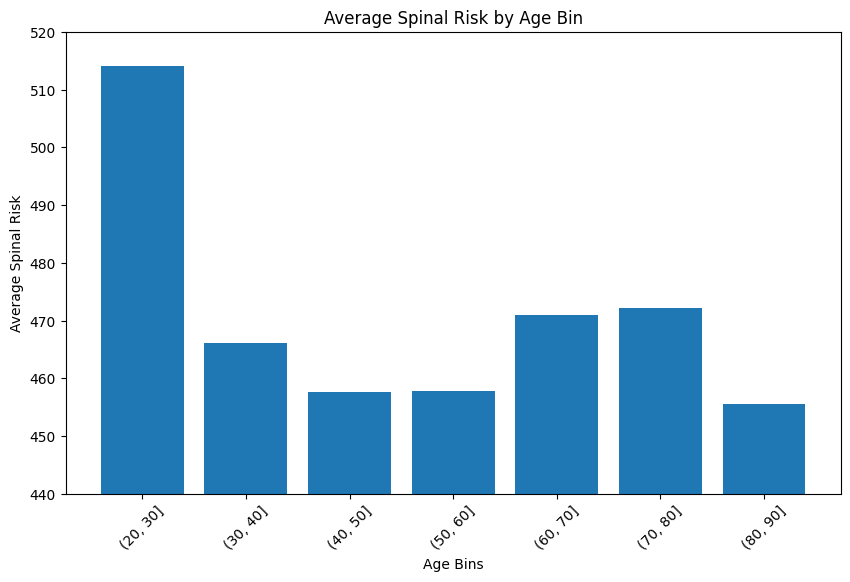

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(average_scores.index.astype(str), average_scores)
plt.xlabel('Age Bins')
plt.ylabel('Average Spinal Risk')
plt.title('Average Spinal Risk by Age Bin')
plt.xticks(rotation=45)
plt.ylim(440, 520) 
plt.show()